# Upscaling validation

In this noteboook, a small dataset will be created to see if the CDO operation works well

In [50]:
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
import xarray as xr

path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/Downscaling_CM/utils"
os.chdir(path)
import dataset

In [59]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003"
os.chdir(path)
filenames = dataset.getfiles()
print(filenames[0:24])

['lffd20030101000000.nc', 'lffd20030101010000.nc', 'lffd20030101020000.nc', 'lffd20030101030000.nc', 'lffd20030101040000.nc', 'lffd20030101050000.nc', 'lffd20030101060000.nc', 'lffd20030101070000.nc', 'lffd20030101080000.nc', 'lffd20030101090000.nc', 'lffd20030101100000.nc', 'lffd20030101110000.nc', 'lffd20030101120000.nc', 'lffd20030101130000.nc', 'lffd20030101140000.nc', 'lffd20030101150000.nc', 'lffd20030101160000.nc', 'lffd20030101170000.nc', 'lffd20030101180000.nc', 'lffd20030101190000.nc', 'lffd20030101200000.nc', 'lffd20030101210000.nc', 'lffd20030101220000.nc', 'lffd20030101230000.nc']


Let's take a random week to upscale

In [62]:
rand_week_2km = dataset.new_dataset(filenames, 172, 179)
rand_week_2km

<xarray.Dataset>
Dimensions:     (rlat: 1542, rlon: 1542, time: 168)
Coordinates:
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    lon         (rlat, rlon) float32 -11.061143 -11.039745 ... 34.343468
    lat         (rlat, rlon) float32 29.60631 29.611563 ... 61.101395 61.095367
    height_2m   float32 2.0
    height_10m  float32 10.0
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-28T23:00:00
Data variables:
    T_2M        (time, rlat, rlon) float32 293.92145 293.89633 ... 279.8134
    RELHUM_2M   (time, rlat, rlon) float32 79.832855 79.31588 ... 96.7639
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

Once the dataset is saved, we open the upscaled version to see if it is really upscalled

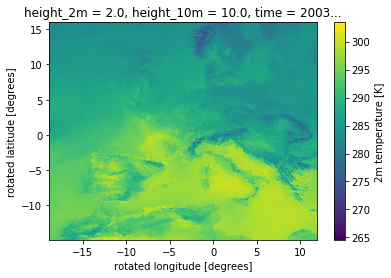

In [63]:
rand_week_2km.T_2M.isel(time=1).plot()

In [66]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/Downscaling_CM/data"
os.chdir(path)
filename = './random_week_2km.nc'
print ('saving to ', filename)
rand_week_2km.to_netcdf(path=filename)
rand_week_2km.close()
print ('finished saving')

saving to  ./random_week_2km.nc
finished saving


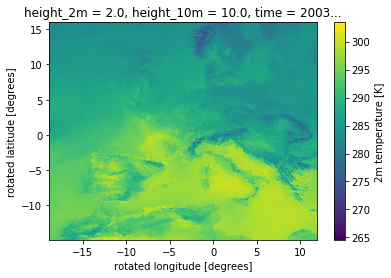

In [67]:
week_2km = xr.open_dataset("random_week_2km.nc")
week_2km.T_2M.isel(time=1).plot()

In [54]:
rand_week_12km = xr.open_dataset("random_week_12km_odim.nc")
rand_week_12km

<xarray.Dataset>
Dimensions:       (rlat: 281, rlon: 280, time: 168)
Coordinates:
  * time          (time) datetime64[ns] 2003-06-22 ... 2003-06-28T23:00:00
  * rlon          (rlon) float64 -18.82 -18.71 -18.6 ... 11.65 11.76 11.87
  * rlat          (rlat) float64 -14.85 -14.74 -14.63 ... 15.73 15.84 15.95
    height_2m     float32 ...
Data variables:
    rotated_pole  int32 ...
    T_2M          (time, rlat, rlon) float32 ...
    RELHUM_2M     (time, rlat, rlon) float32 ...
    TOT_PR        (time, rlat, rlon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jun 09 14:54:48 2022: cdo sellonlatbox,-18.86,11.98,-14...
    CDO:          Climate Data Operators version 2.0.1 (https://mpimet.mpg.de...

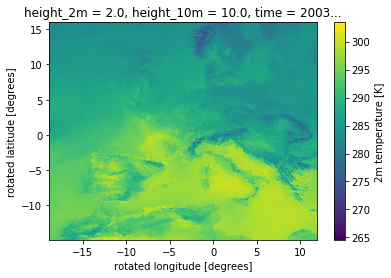

In [55]:
rand_week_2km.T_2M.isel(time=1).plot()

264:304 allows us to better see the variations

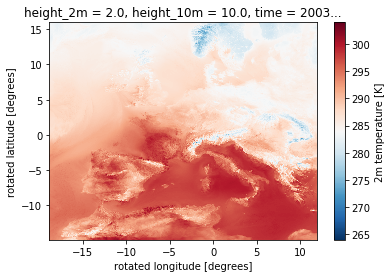

In [56]:
rand_week_2km.T_2M.isel(time=1).plot(vmin = 264, vmax = 304, cmap='RdBu_r')

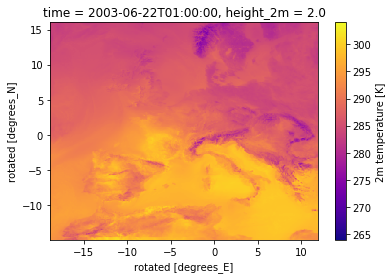

In [39]:
rand_week_12km.T_2M.isel(time=1).plot(vmin = 264, vmax = 304, cmap='plasma')

We clearly see the loss of information, mostly on montainous regions

In [46]:
lat_bnd = [-4, 2]
lon_bnd = [-4, 5]

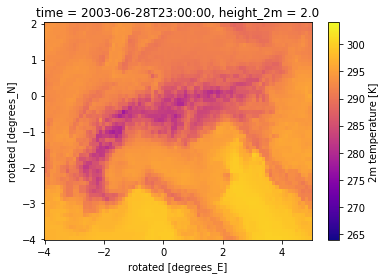

In [49]:
#rand_week_2km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time=-1).plot(vmin = 264, vmax = 304, cmap='plasma')
rand_week_12km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time=-1).plot(vmin = 264, vmax = 304, cmap='plasma')